# Install neccessary dependencies

## Source code
#### small_probs: https://github.com/wlad111/small_probs
#### pymc3_ext: https://github.com/wlad111/pymc3
---



In [13]:
pip install --upgrade git+https://github.com/wlad111/pymc3.git

  Cloning https://github.com/wlad111/pymc3.git to /tmp/pip-req-build-q5vyarzy
  Running command git clone -q https://github.com/wlad111/pymc3.git /tmp/pip-req-build-q5vyarzy
  Created wheel for pymc3-ext: filename=pymc3_ext-0.2.1-cp36-none-any.whl size=422150 sha256=c6fee07185a4dd673cf6b465cd5d94e943135682c502f575a30d1d1302d49138
  Stored in directory: /tmp/pip-ephem-wheel-cache-mvbdk7d4/wheels/ab/24/72/60580136010cedea012926c83bc9c64bca732d7a0bdcdd47c6
Successfully built pymc3-ext
  Found existing installation: pymc3-ext 0.0.1
    Uninstalling pymc3-ext-0.0.1:
      Successfully uninstalled pymc3-ext-0.0.1


In [1]:
pip install --upgrade git+https://github.com/wlad111/small_probs.git

  Cloning https://github.com/wlad111/small_probs.git to /tmp/pip-req-build-myo56zft
  Running command git clone -q https://github.com/wlad111/small_probs.git /tmp/pip-req-build-myo56zft
  Created wheel for small-probs-wlad111: filename=small_probs_wlad111-0.0.1-cp36-none-any.whl size=7784 sha256=ab76addf86450d6935b05dab53bc729f977505fb9807fb6e2a18e3c9a91ada68
  Stored in directory: /tmp/pip-ephem-wheel-cache-skg_5ngx/wheels/1d/77/c8/be52b2ed1b5b1ff7ed73fa631cbe626b9a598569449ad02902
Successfully built small-probs-wlad111
  Found existing installation: small-probs-wlad111 0.0.1
    Uninstalling small-probs-wlad111-0.0.1:
      Successfully uninstalled small-probs-wlad111-0.0.1


In [3]:
pip install nose

     |████████████████████████████████| 163kB 2.7MB/s 


In [4]:
pip install arviz

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 15.0MB/s 
     |████████████████████████████████| 327kB 45.7MB/s 


In [0]:
from small_probs.probability import ProbabilityEstimator
from scipy.spatial.distance import hamming
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Users code with proposal, score, initial value


In [0]:
class string2:


    def __init__(self, length):
        self.n_letters = length
        self.state_fixed = np.array(["A"] * self.n_letters)
        alphabet = frozenset("ATGC")
        self.letters_list = list(alphabet)
        self.proposed = 0
        self.propose_letters = np.random.choice(a=self.letters_list, size=100000)
        self.propose_positions = np.random.choice(a=self.n_letters, size=100000)

    def score(self, state):
        return self.n_letters - np.sum(state != self.state_fixed)

    def proposal(self, state):
        if (self.proposed == 100000):
            self.propose_letters = np.random.choice(a=self.letters_list, size=100000)
            self.propose_positions = np.random.choice(a=self.n_letters, size=100000)
            self.proposed = 0
        state[self.propose_positions[self.proposed]] = self.propose_letters[self.proposed]
        self.proposed += 1
        return state


# Simulating markov chain

In [3]:
s2 = string2(10)
    
ps = ProbabilityEstimator(p=None, scorefun=s2.score, proposal=s2.proposal, default_val=s2.state_fixed, save_trace=True)
ps.estimate_between(10, 11)


performing Wang-Landau algorithm


Sequential sampling (1 chains in 1 job)
GenericCatMetropolis: [S]


In [0]:
gamma = 0.95

#Confidence interal and variance estimae

In [5]:
print("True value: ", 1/4**10)
print("Probability estimation: ", ps.prob)
print("OBM variance estimation: ", ps.var)
print(gamma, " confidence interval for true probability ", ps.confint(0.95))


True value:  9.5367431640625e-07
Probability estimation:  9.846114733185643e-07
OBM variance estimation:  1.8257066618571492e-09
0.95  confidence interval for true probability  (9.008655661935521e-07, 1.0683573804435765e-06)


In [0]:
trace = ps.score_trace


#Plot trace


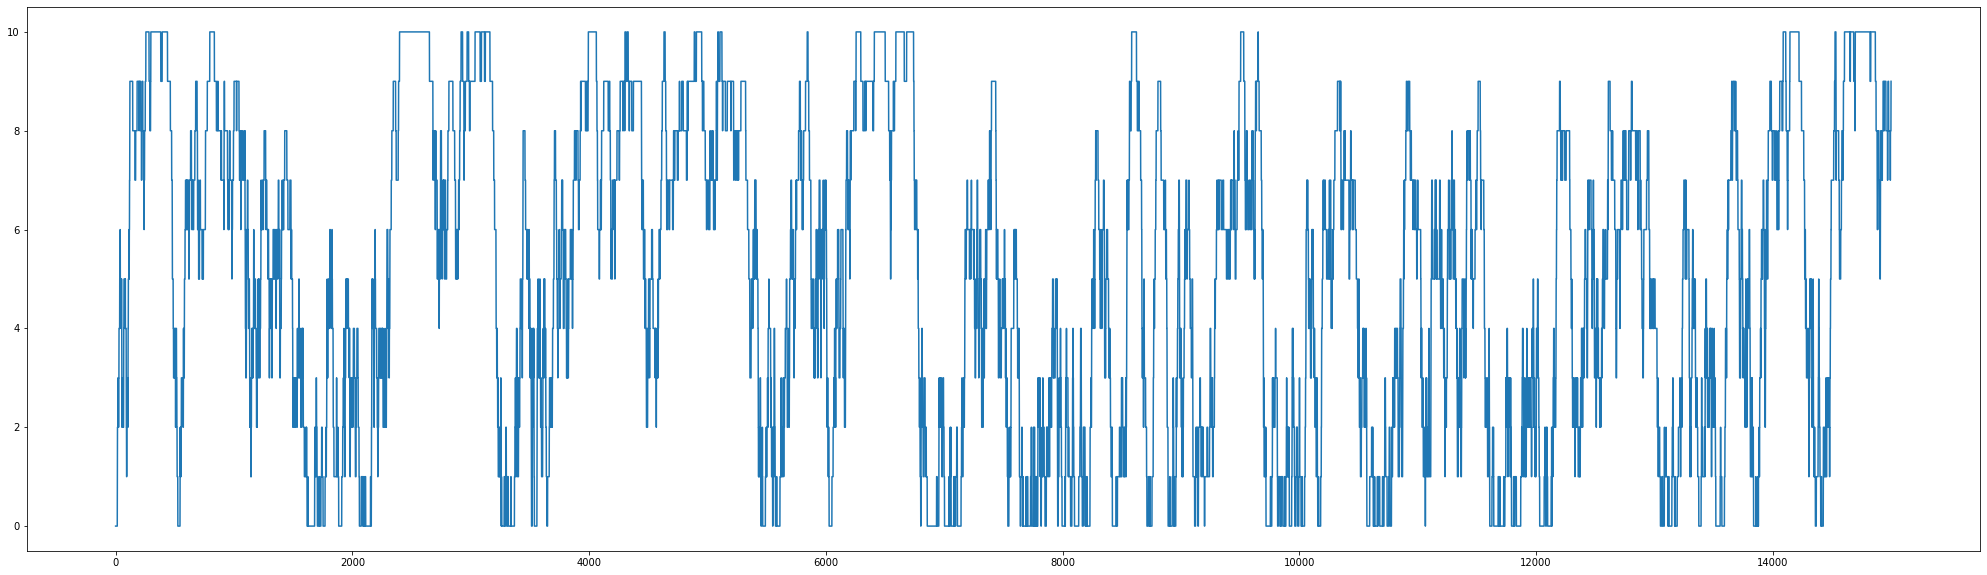

In [7]:
plt.figure(figsize=(35,10))
plt.plot(trace[-15000:])